# PyTorch tensors
        A tensor is a multi-dimensional matrix similar to NumPy's ndarrays

* A scalar can be represented as a zero-dimensional tensor.
* A vector can be represented as a one-dimensional tensor.
* A two-dimensional matrix can be represented as a two-dimensional tensor.
* A multi-dimensional matrix can be represented as a multi-dimensional tensor.

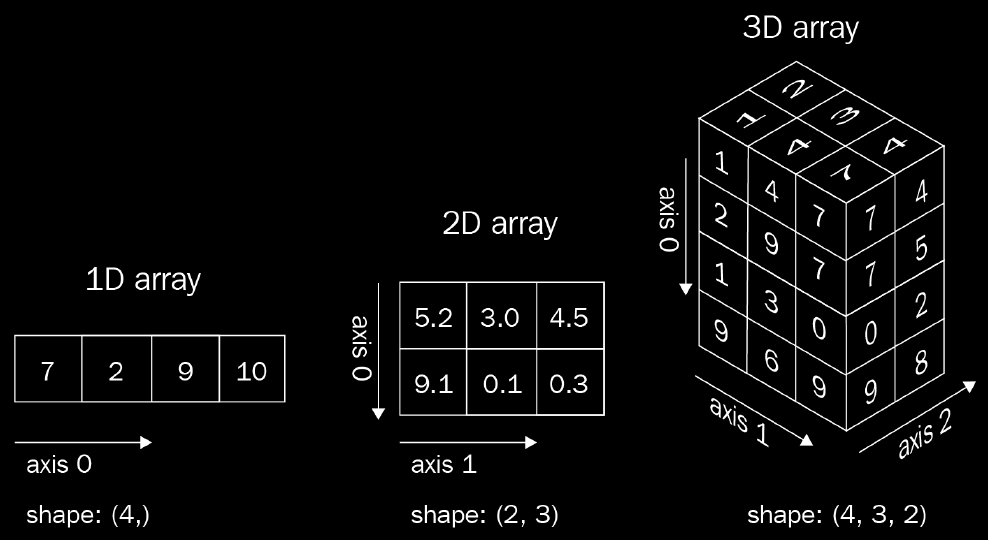

# Initializing a tensor

* Tensors have various applications, including serving as fundamental data structures for images.
* Tensors also commonly used to initialize the weights that connect different layers in a neural network.

In [1]:
# 1. Import PyTorch and initialize a tensor
import torch

x = torch.tensor([1,2])       # one entity of two items
y = torch.tensor([[1],
                  [2]])     # two entities of one item each

# 2. access the tensor object's shape and data type
print(f'Tensor X shape = {x.shape}')
print(f'Tensor Y shape = {y.shape}')
print(f'Tensor data type = {x.dtype}')

Tensor X shape = torch.Size([2])
Tensor Y shape = torch.Size([2, 1])
Tensor data type = torch.int64


     All elements must have the same data type.
     so if it contains different data types, the tensor is converted to the most general data type

In [2]:
x = torch.tensor([False, 1, 2.0])
print(f'Tensor X = {x}')
print(f'Tensor X Dtype = {x.dtype}')

Tensor X = tensor([0., 1., 2.])
Tensor X Dtype = torch.float32


    Tensor objects can be initialized using built-in functions, similar to NumPy.
    This initialization is aim to setting up the initial weights of a neural network.

In [3]:
# 3.Generate a tensor object that has three rows and four columns filled with zeros
zeros_tensor = torch.zeros((3,4))
print(f'Zeros Tensor =  \n{zeros_tensor}')

Zeros Tensor =  
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [4]:
# 4.Generate a tensor object that has three rows and four columns filled with ones
ones_tensor = torch.ones((3,4))
print(f'Ones Tensor = \n {ones_tensor}')

Ones Tensor = 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [5]:
# 5. Generate three rows and four columns of values between 0 and 10
# ==> (including the low value but not including the high value)
random_int_tensor = torch.randint(low=0 , high=10 , size=(3,4))
print(f'Random INT Tensor = \n {random_int_tensor}')

Random INT Tensor = 
 tensor([[6, 3, 8, 3],
        [9, 7, 3, 0],
        [4, 8, 5, 6]])


In [6]:
# 6. Generate random numbers between 0 and 1 with three rows and four columns
random_tensor = torch.rand(3,4)
print(f'Random Tensor = \n {random_tensor}')

Random Tensor = 
 tensor([[0.7331, 0.7857, 0.8718, 0.6322],
        [0.5518, 0.4199, 0.2817, 0.0386],
        [0.9640, 0.6499, 0.6725, 0.1435]])


In [7]:
# 7.Generate numbers that follow a normal distribution with three rows and four columns
normal_distribution_tensor = torch.randn(3,4)
print(f'Normal Distribution Tensor = \n {normal_distribution_tensor}') # output tensor (mean 0 and standard deviation 1 )

Normal Distribution Tensor = 
 tensor([[-1.4167, -1.1252,  0.8349,  0.9924],
        [ 0.1688, -3.3527,  1.5193, -1.7845],
        [ 0.2868, -0.8154,  1.4938,  0.1700]])


In [8]:
# 8. convert a NumPy array into a Torch tensor and revers
import numpy as np
x = np.array([[10,20,30],[2,3,4]])
y = torch.tensor(x)
z = y.numpy()
print(type(x), type(y), type(z))

<class 'numpy.ndarray'> <class 'torch.Tensor'> <class 'numpy.ndarray'>


# Operations on tensors

    Tensor objects allow you to perform basic operations akin to NumPy, including matrix multiplication, bias addition, and reshaping, especially relevant in neural network operations.

In [9]:
# 1. Multiplication of all the elements present in x by 10
x = torch.tensor([[1,2,3,4],
                  [5,6,7,8]])
print(f'Tensor Scalar Multiplication = \n {x*10}')

# 2. Adding 10 to the elements in x
print(f'Tensor Scalar Addition = \n {x+10}')

Tensor Scalar Multiplication = 
 tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])
Tensor Scalar Addition = 
 tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])


In [10]:
# 3. Reshaping a tensor
x = torch.tensor([2, 3, 1, 0])
print(f'Tensor Shape = \n {x.shape}')

x = x.view(2,2)
print(f'Tensor reshaping Shape = \n {x.shape}')

Tensor Shape = 
 torch.Size([4])
Tensor reshaping Shape = 
 torch.Size([2, 2])


In [11]:
# 4. reshape a tensor using the "squeeze" method by specifying the axis index to remove
# but it only works if the targeted axis has a single item in that dimension.
x = torch.randn(10,1,10)
z1 = torch.squeeze(x,1)

# The same operation can be directly performed on
# x by calling squeeze and the dimension to squeeze out
z2 = x.squeeze(1)

# all the elements in both tensors are equal
assert torch.all(z1 == z2)

print(f'orignal shape = \n{x.shape} \n Squeezed shape = \n {z1.shape}')

orignal shape = 
torch.Size([10, 1, 10]) 
 Squeezed shape = 
 torch.Size([10, 10])


In [12]:
# 5. The opposite of squeeze is unsqueeze, which means we add a dimension to the matrix
x = torch.randn(10,10)
z1 = x.unsqueeze(0)

print(f'orignal shape = \n{x.shape} \n UNSqueezed shape = \n {z1.shape}')

orignal shape = 
torch.Size([10, 10]) 
 UNSqueezed shape = 
 torch.Size([1, 10, 10])


In [13]:
# The same can be achieved using [None] indexing
# Adding None will auto create a fake dim at the specified axis
x = torch.randn(10,10)
z2 = x[None,: ,:]
z3 = x[:,None,:]
z4 = x[:,:,None]
print(z2.shape,'\n', z3.shape,'\n', z4.shape)

torch.Size([1, 10, 10]) 
 torch.Size([10, 1, 10]) 
 torch.Size([10, 10, 1])


In [14]:
# 6. Matrix multiplication of two different tensors
y = torch.tensor([2, 3, 1, 0])
y = y.view(4,1)
x = torch.tensor([[1,2,3,4],
                   [5,6,7,8]])
print(f'Matrix multiplication X * y = \n {torch.matmul(x, y)}')

Matrix multiplication X * y = 
 tensor([[11],
        [35]])


In [15]:
# Alternatively, matrix multiplication can also be performed by using the @ operator
print(f'Matrix multiplication X * y = \n {x@y}')

Matrix multiplication X * y = 
 tensor([[11],
        [35]])


In [16]:
# 7. Similar to concatenate in NumPy, we can perform concatenation of tensors using the cat method
x = torch.randn(3,3,3)
z = torch.cat([x,x], axis=0) # np.concatenate()
z1 = torch.cat([x,x], axis=1)
print(f'Shape Before concatenate =\n {x.shape}\nShape After concatenate on X axis = \n{z.shape}\nShape After concatenate on Y axis = \n{z1.shape}')

Shape Before concatenate =
 torch.Size([3, 3, 3])
Shape After concatenate on X axis = 
torch.Size([6, 3, 3])
Shape After concatenate on Y axis = 
torch.Size([3, 6, 3])


In [17]:
# 8. Extraction of the maximum value in a tensor
x = torch.arange(18).reshape(3,6)
print(f"Max Value in Tensor X = {x.max()}")

Max Value in Tensor X = 17


    max return 2 output (values,indices)

In [18]:
x.max(dim=1)  # columns

torch.return_types.max(
values=tensor([ 5, 11, 17]),
indices=tensor([5, 5, 5]))

In [19]:
x.max(dim=0)  # rows

torch.return_types.max(
values=tensor([12, 13, 14, 15, 16, 17]),
indices=tensor([2, 2, 2, 2, 2, 2]))

In [20]:
## NOTE
values , indices = x.max(dim=0)
assert torch.all(indices == x.argmax(dim=0))

    9. The min operation is exactly the same as max but returns the minimum and arg-minimum where applicable.

In [21]:
# 10. Permute the dimensions of a tensor object
x = torch.randn(10,20,30)
z = x.permute(2,0,1) # np.permute()
print(f'Before Permute = {x.shape}\n After Permute = {z.shape}')

Before Permute = torch.Size([10, 20, 30])
 After Permute = torch.Size([30, 10, 20])


        * Never use `tensor.view` to reshape a tensor for swapping dimensions; instead, always use permute to avoid unexpected results during training.

You can perform most NumPy operations in PyTorch with a similar syntax, making it essential to understand that a wide range of mathematical operations can be applied directly to PyTorch tensors, and you can easily find method documentation using `dir(torch.Tensor)` and `help(torch.Tensor.<method>)`.

In [22]:
dir(torch.Tensor)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__cuda_array_interface__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__'

In [23]:
help(torch.Tensor.view)

Help on method_descriptor:

view(...)
    view(*shape) -> Tensor
    
    Returns a new tensor with the same data as the :attr:`self` tensor but of a
    different :attr:`shape`.
    
    The returned tensor shares the same data and must have the same number
    of elements, but may have a different size. For a tensor to be viewed, the new
    view size must be compatible with its original size and stride, i.e., each new
    view dimension must either be a subspace of an original dimension, or only span
    across original dimensions :math:`d, d+1, \dots, d+k` that satisfy the following
    contiguity-like condition that :math:`\forall i = d, \dots, d+k-1`,
    
    .. math::
    
      \text{stride}[i] = \text{stride}[i+1] \times \text{size}[i+1]
    
    Otherwise, it will not be possible to view :attr:`self` tensor as :attr:`shape`
    without copying it (e.g., via :meth:`contiguous`). When it is unclear whether a
    :meth:`view` can be performed, it is advisable to use :meth:`resh

# Auto gradients of tensor objects

* Tensor objects have built-in functionality for calculating gradients, which is crucial for updating neural network weights.

In [24]:
# 1.Define a tensor object and also specify that it requires a gradient to be calculated
x = torch.tensor([[2.0, -1.0],
                  [1.0, 1.0]], requires_grad=True)
# requires_grad parameter specifies that the gradient is to be calculated for the tensor object

x

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)

In [25]:
# 2. define the way to calculate the output, which is the sum of the squares of all inputs
out = x.pow(2).sum() # gradient of function is 2*x

# 3. The gradient of a value can be calculated by calling the backward() method
out.backward()

# 4. the gradient of out with respect to x
print(f'Gradient of x.pow(2) = \n{x.grad}')

Gradient of x.pow(2) = 
tensor([[ 4., -2.],
        [ 2.,  2.]])
